#Удовлетворенность пассажиров авиакомпании

Какие факторы влияют на удовлетворенность клиентов авиакомпании?

Выбранный набор данных содержит опрос удовлетворенности авиапассажиров. Какие факторы сильно коррелируют с удовлетворенным (или неудовлетворенным) пассажиром, можно ли определить по входным признакам является ли пассажир удовлетворенным или неудовлетворенным? Именно таким вопросом я решил задаться в рамках курса "Машинное обучение и анализ данных".

Опишу признаки выбранного набора данных:

1. *Пол:* пол пассажира (женщина, мужчина)

2. *Тип клиента:* тип клиента (постоянный клиент, нелояльный клиент)

3. *Возраст:* фактический возраст пассажира

4. *Тип поездки:* цель полета пассажира (Личная поездка, Деловая поездка)

5. *Класс:* туристический класс пассажира в самолете (Бизнес, Эко, Эко Плюс)

6. *Расстояние полета:* расстояние полета этого рейса

7. *Услуга Wi-Fi на борту:* уровень удовлетворенности услугой Wi-Fi на борту (0: не использовался; 1–5)

8. *Время отправления/прибытия:* уровень удовлетворенности временем отправления/прибытия (от 0 до 5)

9. *Простота онлайн-бронирования:* уровень удовлетворенности онлайн-бронированием (от 0 до 5)

10. *Расположение выхода на посадку:* уровень удовлетворенности расположением выхода на посадку (от 0 до 5)

11. *Еда и напитки:* уровень удовлетворенности едой и напитками (от 0 до 5)

12. *Онлайн-регистрация на рейс:* уровень удовлетворенности от онлайн-регистрации (от 0 до 5)

13. *Комфортабельность сиденья:* уровень удовлетворенности комфортабельностью сиденья (от 0 до 5)

14. *Развлечения на борту:* уровень удовлетворенности развлечениями на борту (от 0 до 5)

15. *Обслуживание на борту:* уровень удовлетворенности обслуживанием на борту (от 0 до 5)

16. *Место для ног:* уровень удовлетворенности местом для ног (от 0 до 5)

17. *Обработка багажа:* уровень удовлетворенности обработкой багажа (от 1 до 5)

18. *Услуга регистрации:* уровень удовлетворенности услугой регистрации (от 0 до 5)

19. *Обслуживание в полете:* уровень удовлетворенности обслуживанием в полете (от 0 до 5)

20. *Чистота:* уровень удовлетворенности чистотой на борту (от 0 до 5)

21. *Задержка отправления в минутах:* минуты задержки при отправлении

22. *Задержка прибытия в минутах:* минуты задержки при прибытии

23. *Удовлетворенность:* уровень удовлетворенности авиакомпанией   (удовлетворительно, нейтрально или неудовлетворительно)

###Подключение необходимых библиотек

In [32]:
import numpy                       # Одномерные и многомерные массивы
import pandas                      # Таблицы и временные ряды
import matplotlib.pyplot as pyplot # Научная графика
import seaborn                     # Еще больше графики для визуализации данных

%matplotlib inline

###Загрузка набора данных

In [33]:
raw_data_url = "https://raw.githubusercontent.com/Reloadif/MachineLearningCourse/main/AirlinePassengerSatisfaction.csv"
raw_data = pandas.read_csv(raw_data_url)

raw_data = raw_data.drop(raw_data.columns[[0,1]], axis=1) # Удаляю ненужные колонки

###Визуализация и вычисление основных характеристик набора данных

In [18]:
raw_data.shape

(103904, 23)

In [19]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103904 non-null  object 
 1   Customer Type                      103904 non-null  object 
 2   Age                                103904 non-null  int64  
 3   Type of Travel                     103904 non-null  object 
 4   Class                              103904 non-null  object 
 5   Flight Distance                    103904 non-null  int64  
 6   Inflight wifi service              103904 non-null  int64  
 7   Departure/Arrival time convenient  103904 non-null  int64  
 8   Ease of Online booking             103904 non-null  int64  
 9   Gate location                      103904 non-null  int64  
 10  Food and drink                     103904 non-null  int64  
 11  Online boarding                    1039

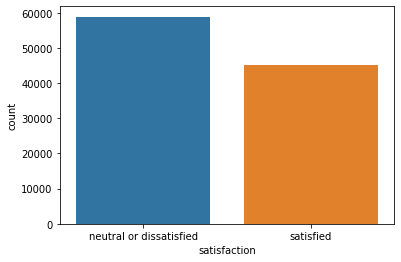

In [20]:
seaborn.countplot(x='satisfaction', data=raw_data)
pass

In [21]:
raw_data['Gender'] = raw_data['Gender'].astype('category')
raw_data['Customer Type'] = raw_data['Customer Type'].astype('category')
raw_data['Type of Travel'] = raw_data['Type of Travel'].astype('category')
raw_data['Class'] = raw_data['Class'].astype('category')
raw_data['satisfaction'] = raw_data['satisfaction'].astype('category')

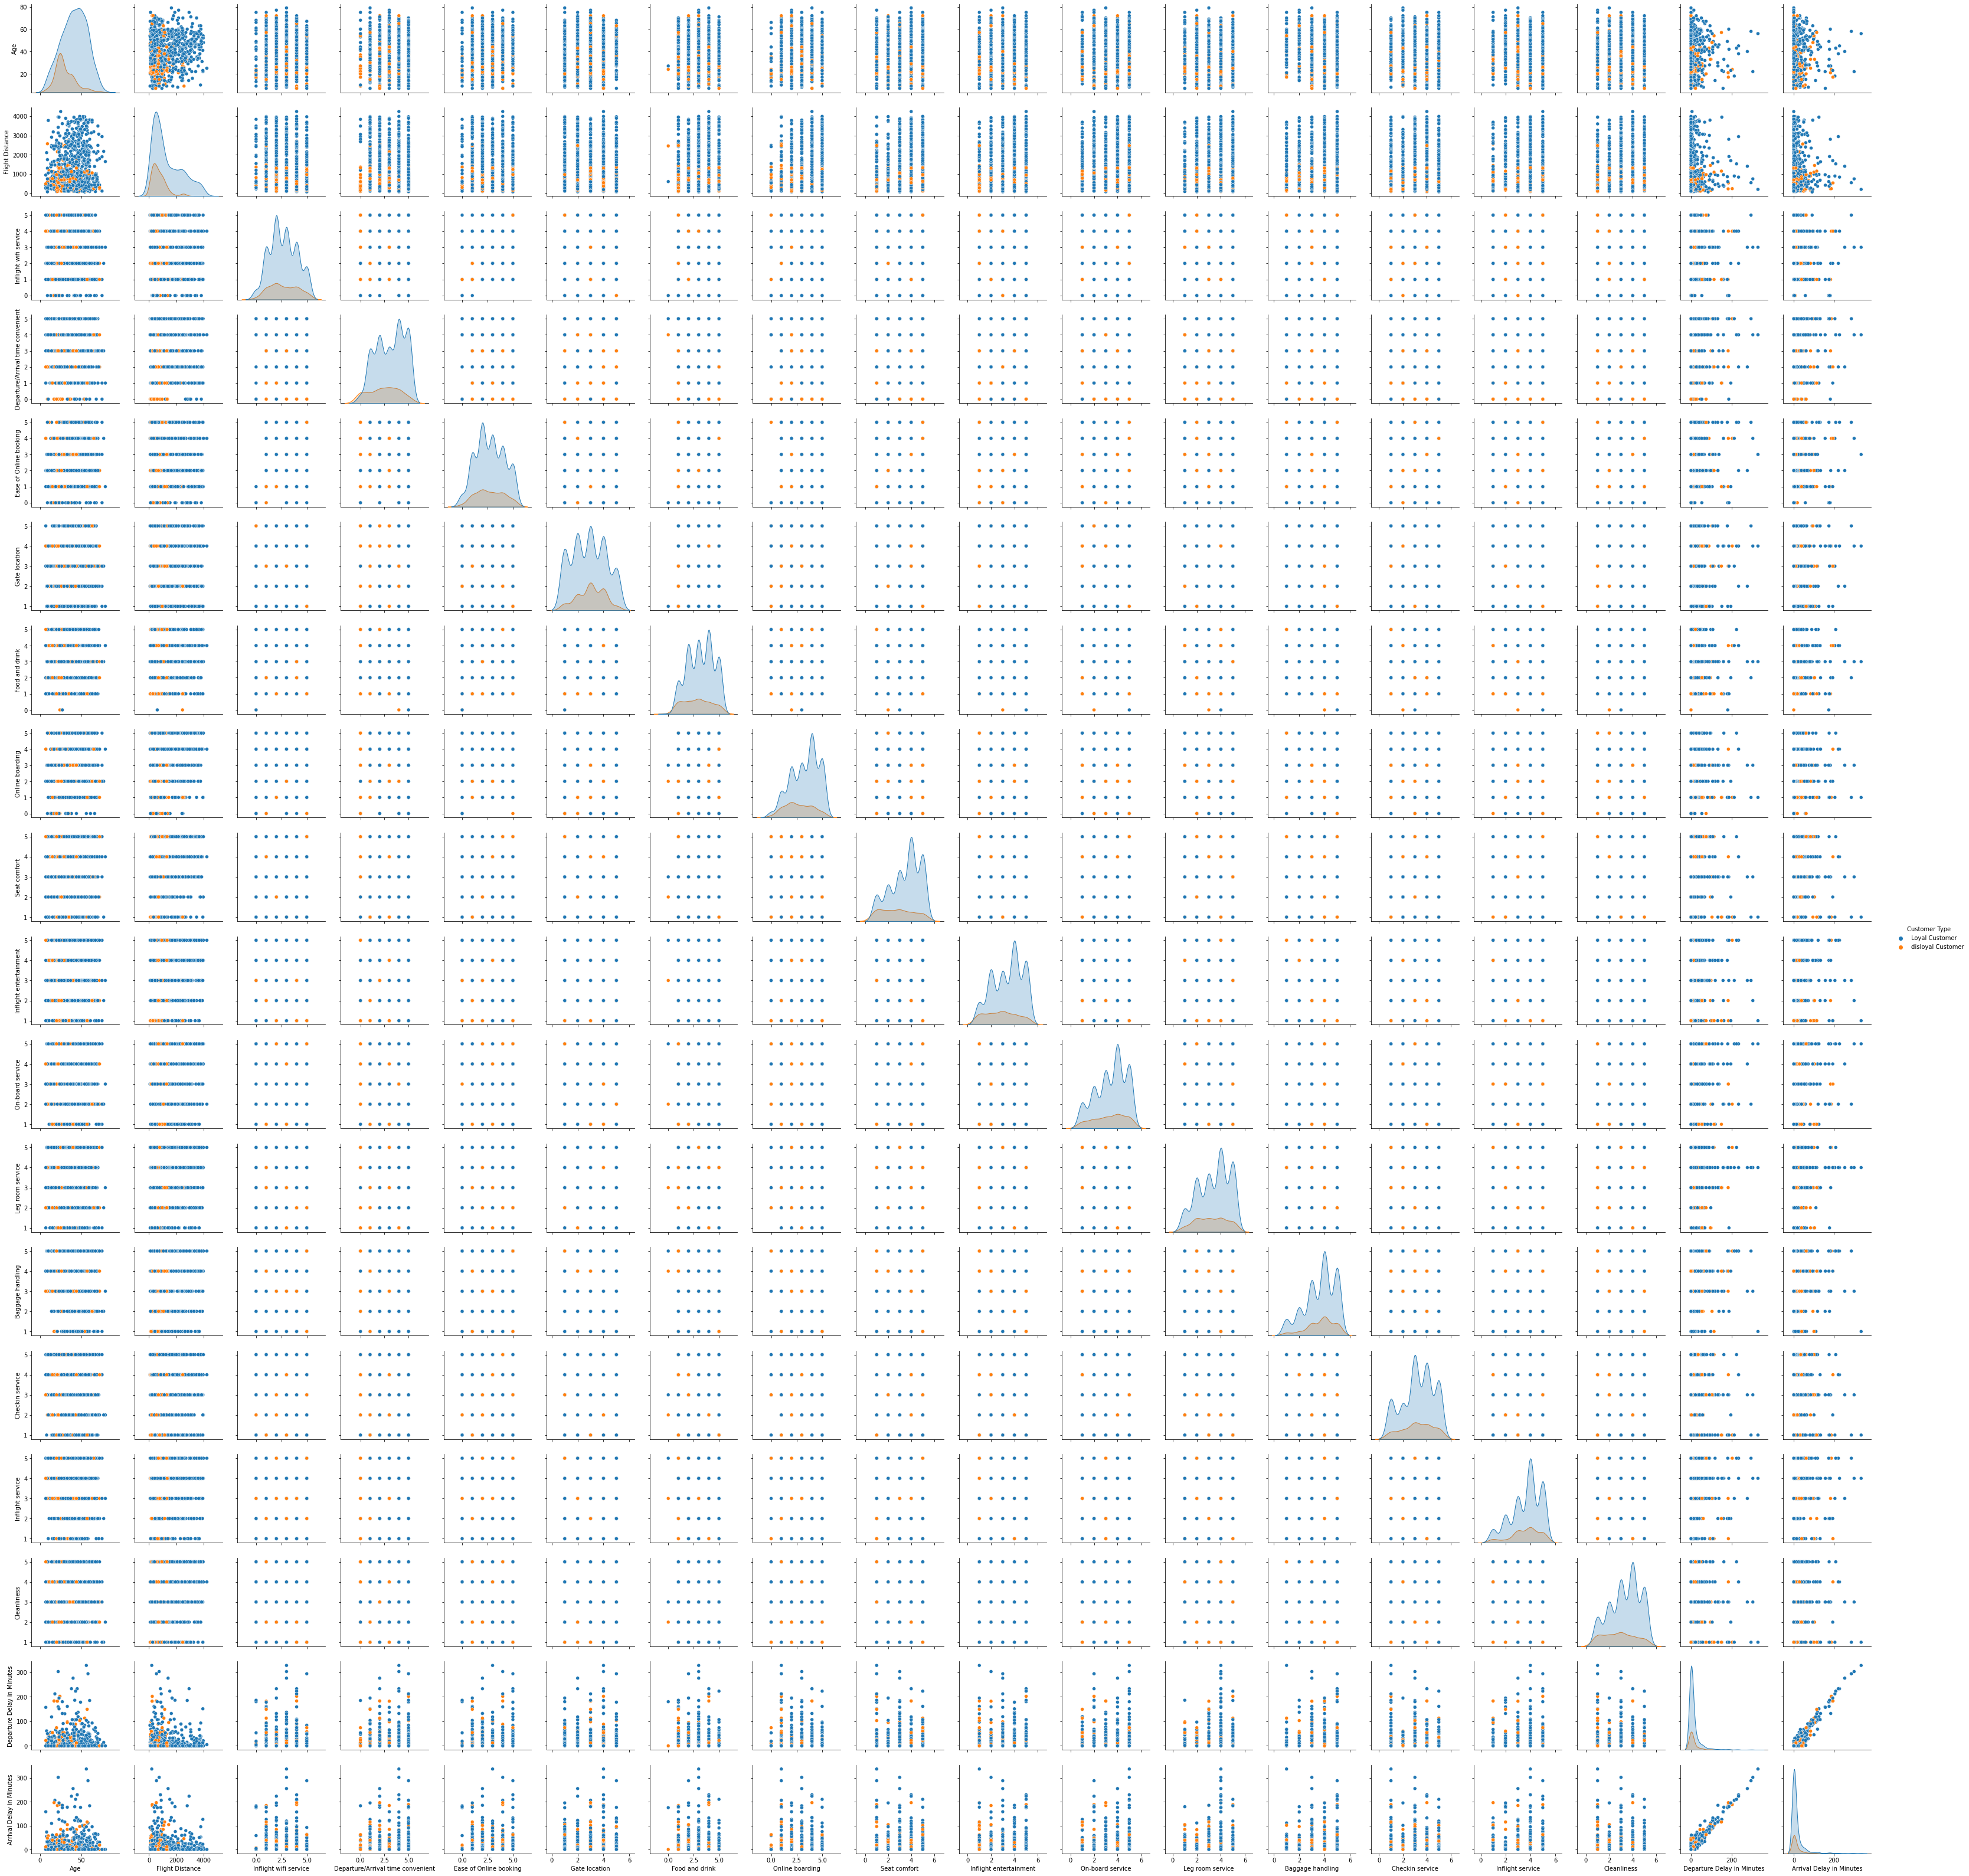

In [22]:
seaborn.pairplot(raw_data.sample(1000), hue='Customer Type')
pass

In [23]:
raw_data.describe()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


Значение строк:
1. count - количество значений для каждого признака;
2. mean - среднее значение;
3. std - стандартное отклонение;
4. min - минимальное значение;
5. 25% - первый квартиль;
6. 50% - медиана;
7. 75% - третий квартиль;
8. max - максимальное значение.

In [24]:
corr_matrix = raw_data.corr()
corr_matrix

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
Age,1.000000,0.099461,0.017859,0.038125,0.024842,-0.001330,0.023000,0.208939,0.160277,0.076444,0.057594,0.040583,-0.047529,0.035482,-0.049427,0.053611,-0.010152,-0.012147
Flight Distance,0.099461,1.000000,0.007131,-0.020043,0.065717,0.004793,0.056994,0.214869,0.157333,0.128740,0.109526,0.133916,0.063184,0.073072,0.057540,0.093149,0.002158,-0.002426
Inflight wifi service,0.017859,0.007131,1.000000,0.343845,0.715856,0.336248,0.134718,0.456970,0.122658,0.209321,0.121500,0.160473,0.120923,0.043193,0.110441,0.132698,-0.017402,-0.019095
Departure/Arrival time convenient,0.038125,-0.020043,0.343845,1.000000,0.436961,0.444757,0.004906,0.070119,0.011344,-0.004861,0.068882,0.012441,0.072126,0.093333,0.073318,0.014292,0.001005,-0.000864
Ease of Online booking,0.024842,0.065717,0.715856,0.436961,1.000000,0.458655,0.031873,0.404074,0.030014,0.047032,0.038833,0.107601,0.038762,0.011081,0.035272,0.016179,-0.006371,-0.007984
Gate location,-0.001330,0.004793,0.336248,0.444757,0.458655,1.000000,-0.001159,0.001688,0.003669,0.003517,-0.028373,-0.005873,0.002313,-0.035427,0.001681,-0.003830,0.005467,0.005143
Food and drink,0.023000,0.056994,0.134718,0.004906,0.031873,-0.001159,1.000000,0.234468,0.574556,0.622512,0.059073,0.032498,0.034746,0.087299,0.033993,0.657760,-0.029926,-0.032524
Online boarding,0.208939,0.214869,0.456970,0.070119,0.404074,0.001688,0.234468,1.000000,0.420211,0.285066,0.155443,0.123950,0.083280,0.204462,0.074573,0.331517,-0.018982,-0.021949
Seat comfort,0.160277,0.157333,0.122658,0.011344,0.030014,0.003669,0.574556,0.420211,1.000000,0.610590,0.131971,0.105559,0.074542,0.191854,0.069218,0.678534,-0.027898,-0.029900
Inflight entertainment,0.076444,0.128740,0.209321,-0.004861,0.047032,0.003517,0.622512,0.285066,0.610590,1.000000,0.420153,0.299692,0.378210,0.120867,0.404855,0.691815,-0.027489,-0.030703


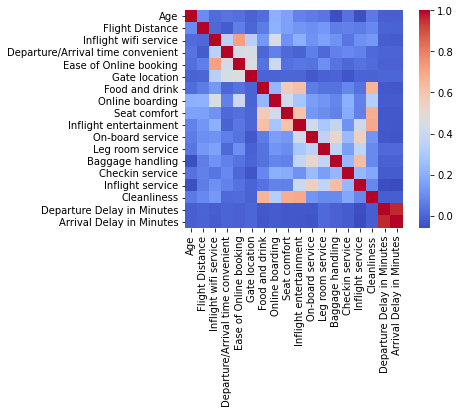

In [25]:
seaborn.heatmap(corr_matrix, square=True, cmap="coolwarm")
pass

In [26]:
corr_matrix.where(numpy.triu(numpy.abs(corr_matrix) > 0.5, k=1)).stack().sort_values(ascending=False)

Departure Delay in Minutes  Arrival Delay in Minutes    0.965481
Inflight wifi service       Ease of Online booking      0.715856
Inflight entertainment      Cleanliness                 0.691815
Seat comfort                Cleanliness                 0.678534
Food and drink              Cleanliness                 0.657760
Baggage handling            Inflight service            0.628561
Food and drink              Inflight entertainment      0.622512
Seat comfort                Inflight entertainment      0.610590
Food and drink              Seat comfort                0.574556
On-board service            Inflight service            0.550782
                            Baggage handling            0.519134
dtype: float64

###Обработка пропущенных значений

В моем наборе данных присутсвуют пропущенные значения - 310 значений признака "Задержка прибытия в минутах". Я решил удалить строки с пропущенными значениями, так как они составляют ничтожно малую часть набора данных.

В общем случае лучше заменить пропущенные значения для числовых признаков - медианами, а для категориальных - модами.

In [34]:
raw_data.isnull().sum()

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

In [35]:
#raw_data['Arrival Delay in Minutes'] = raw_data['Arrival Delay in Minutes'].fillna(raw_data['Arrival Delay in Minutes'].median(axis=0), axis=0)
raw_data = raw_data.dropna()

###Нормализация набора данных

Необходимость нормализации вызвана тем, что разные признаки обучающего набора данных могут быть представлены в разных масштабах и изменяться в разных диапазонах. В этом случае возникает нарушение баланса между влиянием входных переменных, представленных в разных масштабах, на выходную переменную. То есть это влияние обусловлено не реальной зависимостью, а изменением масштаба. В результате, обучаемая модель может выявить некорректные зависимости.

В моем случае нормализация является спорной, так как 14 из 18 числовых признаков уже являются нормализованными от 0 до 5, но всеже в этом есть смысл из-за больших значений "Расстояние полета", "Задержка отправления в минутах", "Задержка прибытия в минутах".

Изменим признак "Удовлетворенность" таким образом, чтобы он был пригоден для задачи классификации. Для этого заменим текущие строковые значения на числовые, "neutral or dissatisfied" заменим на 0, а "satisfied" на 1. Также изменим тип колонки "Удовлетворенность" на "int64".

In [36]:
raw_data = raw_data.replace({'neutral or dissatisfied': 0, 'satisfied': 1})
raw_data['satisfaction'] = raw_data['satisfaction'].astype('int64')

В целях повышения наглядности визуализации были введены категориальные признаки. Теперь от них нужно избавиться путем ввода бинарных признаков для каждой из категорий.

In [37]:
raw_data = pandas.get_dummies(raw_data)

Нормализация числовых признаков выполняется путем линейного преобразования диапазона каждого из числовых значений к отрезку [0;1].

In [38]:
raw_data = (raw_data - raw_data.min(axis=0)) / (raw_data.max(axis=0) - raw_data.min(axis=0))

###Разбиение данных на обучающую и тестовую выборки

Импорт необходимых модулей

In [39]:
from sklearn.model_selection import train_test_split

В качестве размера обучающей выборки выберем 20000 строк, а в качестве тестовой 5000.

In [40]:
y = raw_data['satisfaction']
x = raw_data.drop('satisfaction', axis=1)

x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    train_size = 20000, test_size = 5000, 
                                                    stratify = y, random_state = 4090)

###Kлассификатор k ближайших соседей

Выбор значения k (соседнее число, то есть несколько ближайших точек для прогнозирования при прогнозировании целевой точки) напрямую повлияет на результат прогнозирования.
Когда значение k мало, модель будет больше зависеть от ближайших соседних выборок и будет иметь лучшую чувствительность, но стабильность будет слабее, что может легко привести к переобучению.
Когда значение k велико, стабильность увеличивается, но чувствительность снижается, что легко приводит к недостаточной подгонке.

Импорт необходимых модулей

In [34]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, mean_squared_error

3 соседа

In [35]:
knc_model = KNeighborsClassifier(n_neighbors=3)
knc_model.fit(x_train, y_train)

y_train_pred = knc_model.predict(x_train)
y_test_pred = knc_model.predict(x_test)

print("Оценка точности. Обучающая {:.2f}%, тестовая {:.2f}%".format(accuracy_score(y_train, y_train_pred) * 100, accuracy_score(y_test, y_test_pred) * 100))
print("Среднеквадратическая ошибка. Обучающая {:.2f}%, тестовая {:.2f}%".format(mean_squared_error(y_train, y_train_pred) * 100, mean_squared_error(y_test, y_test_pred) * 100))

Оценка точности. Обучающая 95.23%, тестовая 91.40%
Среднеквадратическая ошибка. Обучающая 4.76%, тестовая 8.60%


5 соседей (по умолчанию)

In [36]:
knc_model = KNeighborsClassifier()
knc_model.fit(x_train, y_train)

y_train_pred = knc_model.predict(x_train)
y_test_pred = knc_model.predict(x_test)

print("Оценка точности. Обучающая {:.2f}%, тестовая {:.2f}%".format(accuracy_score(y_train, y_train_pred) * 100, accuracy_score(y_test, y_test_pred) * 100))
print("Среднеквадратическая ошибка. Обучающая {:.2f}%, тестовая {:.2f}%".format(mean_squared_error(y_train, y_train_pred) * 100, mean_squared_error(y_test, y_test_pred) * 100))

Оценка точности. Обучающая 94.08%, тестовая 91.64%
Среднеквадратическая ошибка. Обучающая 5.92%, тестовая 8.36%


7 соседей

In [37]:
knc_model = KNeighborsClassifier(n_neighbors=7)
knc_model.fit(x_train, y_train)

y_train_pred = knc_model.predict(x_train)
y_test_pred = knc_model.predict(x_test)

print("Оценка точности. Обучающая {:.2f}%, тестовая {:.2f}%".format(accuracy_score(y_train, y_train_pred) * 100, accuracy_score(y_test, y_test_pred) * 100))
print("Среднеквадратическая ошибка. Обучающая {:.2f}%, тестовая {:.2f}%".format(mean_squared_error(y_train, y_train_pred) * 100, mean_squared_error(y_test, y_test_pred) * 100))

Оценка точности. Обучающая 93.39%, тестовая 91.52%
Среднеквадратическая ошибка. Обучающая 6.61%, тестовая 8.48%


9 соседей

In [38]:
knc_model = KNeighborsClassifier(n_neighbors=9)
knc_model.fit(x_train, y_train)

y_train_pred = knc_model.predict(x_train)
y_test_pred = knc_model.predict(x_test)

print("Оценка точности. Обучающая {:.2f}%, тестовая {:.2f}%".format(accuracy_score(y_train, y_train_pred) * 100, accuracy_score(y_test, y_test_pred) * 100))
print("Среднеквадратическая ошибка. Обучающая {:.2f}%, тестовая {:.2f}%".format(mean_squared_error(y_train, y_train_pred) * 100, mean_squared_error(y_test, y_test_pred) * 100))

Оценка точности. Обучающая 92.94%, тестовая 91.60%
Среднеквадратическая ошибка. Обучающая 7.05%, тестовая 8.40%


**Вывод**

При увелечении гиперпараметра k (соседнее число), точность на обучающей выборке падает в среденем на 0.75%, а точность на тестовой выборке колеблется около 91.5%.

###Дерево решений

Импорт необходимых модулей

In [39]:
from sklearn.tree import DecisionTreeClassifier

По умолчанию

In [40]:
dtc_model = DecisionTreeClassifier()
dtc_model.fit(x_train,y_train)

y_train_pred = dtc_model.predict(x_train)
y_test_pred = dtc_model.predict(x_test)

print ('Глубина:', dtc_model.get_depth())
print ('Листья:', dtc_model.get_n_leaves())

print("Оценка точности. Обучающая {:.2f}%, тестовая {:.2f}%".format(accuracy_score(y_train, y_train_pred) * 100, accuracy_score(y_test, y_test_pred) * 100))
print("Среднеквадратическая ошибка. Обучающая {:.2f}%, тестовая {:.2f}%".format(mean_squared_error(y_train, y_train_pred) * 100, mean_squared_error(y_test, y_test_pred) * 100))

Глубина: 29
Листья: 954
Оценка точности. Обучающая 100.00%, тестовая 92.96%
Среднеквадратическая ошибка. Обучающая 0.00%, тестовая 7.04%


Глубина 9

In [41]:
dtc_model = DecisionTreeClassifier(max_depth=9)
dtc_model.fit(x_train,y_train)

y_train_pred = dtc_model.predict(x_train)
y_test_pred = dtc_model.predict(x_test)

print ('Глубина:', dtc_model.get_depth())
print ('Листья:', dtc_model.get_n_leaves())

print("Оценка точности. Обучающая {:.2f}%, тестовая {:.2f}%".format(accuracy_score(y_train, y_train_pred) * 100, accuracy_score(y_test, y_test_pred) * 100))
print("Среднеквадратическая ошибка. Обучающая {:.2f}%, тестовая {:.2f}%".format(mean_squared_error(y_train, y_train_pred) * 100, mean_squared_error(y_test, y_test_pred) * 100))

Глубина: 9
Листья: 185
Оценка точности. Обучающая 95.06%, тестовая 93.02%
Среднеквадратическая ошибка. Обучающая 4.93%, тестовая 6.98%


Глубина 12

In [42]:
dtc_model = DecisionTreeClassifier(max_depth=12)
dtc_model.fit(x_train,y_train)

y_train_pred = dtc_model.predict(x_train)
y_test_pred = dtc_model.predict(x_test)

print ('Глубина:', dtc_model.get_depth())
print ('Листья:', dtc_model.get_n_leaves())

print("Оценка точности. Обучающая {:.2f}%, тестовая {:.2f}%".format(accuracy_score(y_train, y_train_pred) * 100, accuracy_score(y_test, y_test_pred) * 100))
print("Среднеквадратическая ошибка. Обучающая {:.2f}%, тестовая {:.2f}%".format(mean_squared_error(y_train, y_train_pred) * 100, mean_squared_error(y_test, y_test_pred) * 100))

Глубина: 12
Листья: 429
Оценка точности. Обучающая 97.36%, тестовая 93.90%
Среднеквадратическая ошибка. Обучающая 2.64%, тестовая 6.10%


Алгоритм дерева решений оказался точнее алгоритма к-ближайших соседей при оптимальных параметрах каждого из методов, как на обучающей выборке, так и на тестовой, но менее существенно.

###Общие выводы

В работе производился анализ данных о удовлетворенности пассажиров авиакомпании и решение задачи классификации с помощью моделей, которые были натренированы методами k-ближайших соседей и дерева решений. В ходе работы проведены:

1. Вычисление основных статистических характеристик
2. Визуализация данных
3. Обработка пропущенных значений
4. Обработка категориальных признаков
4. Нормализация числовых признаков
5. Разбиение данных на обучающую и тестовую выборки

# Продолжение

###Логистическая регрессия

Импорт необходимых модулей

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [48]:
lr = LogisticRegression(solver="liblinear")
lr.fit(x_train, y_train)

y_test_pred = lr.predict(x_test)
y_train_pred = lr.predict(x_train)

print("Оценка точности. Обучающая {:.2f}%, тестовая {:.2f}%".format(accuracy_score(y_train, y_train_pred) * 100, accuracy_score(y_test, y_test_pred) * 100))
print("Среднеквадратическая ошибка. Обучающая {:.2f}%, тестовая {:.2f}%".format(mean_squared_error(y_train, y_train_pred) * 100, mean_squared_error(y_test, y_test_pred) * 100), end="\n\n")

Оценка точности. Обучающая 87.62%, тестовая 87.52%
Среднеквадратическая ошибка. Обучающая 12.38%, тестовая 12.48%



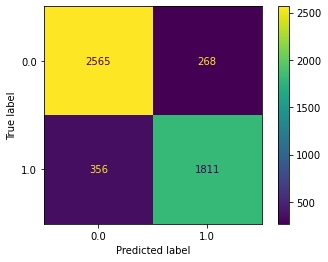

In [49]:
c_m = confusion_matrix(y_test, lr.predict(x_test), labels=lr.classes_)
ConfusionMatrixDisplay(confusion_matrix=c_m, display_labels=lr.classes_).plot()
pyplot.show()
pass

###Random forest

Импорт необходимых модулей

In [ ]:
from sklearn import ensemble

In [ ]:
rf = ensemble.RandomForestClassifier(n_estimators = 1000)
rf.fit(x_train, y_train)

y_test_pred = rf.predict(x_test)
y_train_pred = rf.predict(x_train)

print("Оценка точности. Обучающая {:.2f}%, тестовая {:.2f}%".format(accuracy_score(y_train, y_train_pred) * 100, accuracy_score(y_test, y_test_pred) * 100))
print("Среднеквадратическая ошибка. Обучающая {:.2f}%, тестовая {:.2f}%".format(mean_squared_error(y_train, y_train_pred) * 100, mean_squared_error(y_test, y_test_pred) * 100), end="\n\n")

In [ ]:
c_m = confusion_matrix(y_test, rf.predict(x_test), labels=rf.classes_)
ConfusionMatrixDisplay(confusion_matrix=c_m, display_labels=rf.classes_).plot()
pyplot.show()
pass

###Полносвязная двухслойная неглубокая нейронная сеть

В качестве solver выберем наиболее эффективный алгоритм "adam". В качестве функции активации выберем "relu".

Импорт необходимых модулей

In [43]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

In [44]:
mlp = MLPClassifier(hidden_layer_sizes = (20,),
                    solver = 'adam', 
                    activation = 'relu',
                    random_state = 7,
                    max_iter=100
                    )
mlp.fit(x_train, y_train)

y_test_pred = mlp.predict(x_test)
y_train_pred = mlp.predict(x_train)

print("Оценка точности. Обучающая {:.2f}%, тестовая {:.2f}%".format(accuracy_score(y_train, y_train_pred) * 100, accuracy_score(y_test, y_test_pred) * 100))
print("Среднеквадратическая ошибка. Обучающая {:.2f}%, тестовая {:.2f}%".format(mean_squared_error(y_train, y_train_pred) * 100, mean_squared_error(y_test, y_test_pred) * 100), end="\n\n")

print("Матрица рассогласования для обучающей выборки:\n {}".format(confusion_matrix(y_train, y_train_pred)))
print("Матрица рассогласования для тестовой выборки:\n {}".format(confusion_matrix(y_test, y_test_pred)))

Оценка точности. Обучающая 93.74%, тестовая 93.60%
Среднеквадратическая ошибка. Обучающая 6.26%, тестовая 6.40%

Матрица рассогласования для обучающей выборки:
 [[10833   499]
 [  753  7915]]
Матрица рассогласования для тестовой выборки:
 [[2702  131]
 [ 189 1978]]


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


In [45]:
n = 10
sizes = numpy.linspace(1, 50, n).astype(int)
test_err = numpy.zeros((n, n))
train_err = numpy.zeros((n, n))
train_acc = numpy.zeros((n, n))
test_acc = numpy.zeros((n, n))

for i, size_1 in tqdm(enumerate(sizes)):
    for j, size_2 in enumerate(sizes):
        model = MLPClassifier(hidden_layer_sizes=(size_1, size_2, ),
                              solver='adam', 
                              activation='relu',
                              max_iter=1000,
                              random_state=42
                              )
        model.fit(x_train, y_train)

        y_train_pred = model.predict(x_train)
        y_test_pred = model.predict(x_test)

        train_err[i][j] = numpy.mean(y_train != y_train_pred)
        test_err[i][j] = numpy.mean(y_test != y_test_pred)

        train_acc[i][j] = accuracy_score(y_train, y_train_pred)
        test_acc[i][j] = accuracy_score(y_test, y_test_pred)

10it [42:38, 255.88s/it]


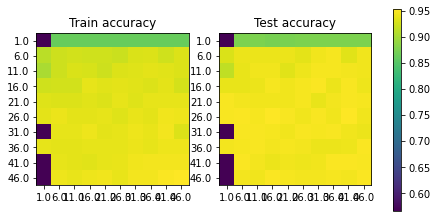

In [56]:
pyplot.subplot(121)
pyplot.title("Train accuracy")
pyplot.imshow(train_acc)
pyplot.xticks(numpy.arange(n), numpy.arange(1, 50, 50 / n))
pyplot.yticks(numpy.arange(n), numpy.arange(1, 50, 50 / n))

pyplot.subplot(122)
pyplot.title("Test accuracy")
pyplot.imshow(test_acc)
pyplot.xticks(numpy.arange(n), numpy.arange(1, 50, 50 / n))
pyplot.yticks(numpy.arange(n), numpy.arange(1, 50, 50 / n))

cax = pyplot.axes([0.95, 0.15, 0.02, 0.7])
pyplot.colorbar(cax=cax)
pass

TypeError: ignored

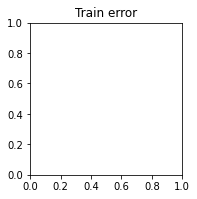

In [72]:
pyplot.subplot(121)
pyplot.title("Train error")
pyplot.imshow(train_err)
pyplot.xticks(numpy.arange(n), numpy.arange(1, 50, 50 / n))
pyplot.yticks(numpy.arange(n), numpy.arange(1, 50, 50 / n))

pyplot.subplot(122)
pyplot.title("Test error")
pyplot.imshow(test_err)
pyplot.xticks(numpy.arange(n), numpy.arange(1, 50, 50 / n))
pyplot.yticks(numpy.arange(n), numpy.arange(1, 50, 50 / n))

cax = pyplot.axes([0.96, 0.15, 0.02, 0.7])
pyplot.colorbar(cax=cax)
pass

In [59]:
train_max_acc = numpy.where(train_acc == numpy.max(train_acc))
test_max_acc = numpy.where(test_acc == numpy.max(test_acc))

train_max_acc_sizes = [train_max_acc[0][0] * 5, train_max_acc[1][0] * 5]
test_max_acc_sizes = [test_max_acc[0][0] * 5, test_max_acc[1][0] * 5]

print("Обучающая выборка: максимальная точность = {0}, количество нейронов = {1},{2}".format(numpy.max(train_acc), train_max_acc_sizes[0], train_max_acc_sizes[1]))
print("при этом тестовая выборка: точность = {0}, количество нейронов = {1},{2}\n".format(test_acc[train_max_acc][0], train_max_acc_sizes[0], train_max_acc_sizes[1]))

print("Тестовая выборка: максимальная точность = {0}, количество нейронов = {1},{2}".format(numpy.max(test_acc), test_max_acc_sizes[0], test_max_acc_sizes[1]))
print("при этом обучающая выборка: точность = {0}, количество нейронов = {1},{2}\n".format(train_acc[test_max_acc][0], test_max_acc_sizes[0], test_max_acc_sizes[1]))

Обучающая выборка: максимальная точность = 0.9748, количество нейронов = 45,45
при этом тестовая выборка: точность = 0.9508, количество нейронов = 45,45

Тестовая выборка: максимальная точность = 0.9534, количество нейронов = 25,40
при этом обучающая выборка: точность = 0.96545, количество нейронов = 25,40



In [58]:
train_min_loss = numpy.where(train_err == numpy.min(train_err))
test_min_loss = numpy.where(test_err == numpy.min(test_err))

train_min_loss_sizes = [train_min_loss[0][0] * 5, train_min_loss[1][0] * 5]
test_min_loss_sizes = [test_min_loss[0][0] * 5, test_min_loss[1][0] * 5]

print("Обучающая выборка: минимальная ошибка = {0}, количество нейронов = {1},{2}".format(numpy.min(train_err), train_min_loss_sizes[0], train_min_loss_sizes[1]))
print("при этом тестовая выборка: ошибка = {0}, количество нейронов = {1},{2}\n".format(test_err[train_min_loss][0], train_min_loss_sizes[0], train_min_loss_sizes[1]))

print("Тестовая выбока: минимальная ошибка = {0}, количество нейронов = {1},{2}".format(numpy.min(test_err), test_min_loss_sizes[0], test_min_loss_sizes[1]))
print("при этом обучающая выборка: ошибка = {0}, количество нейронов = {1},{2}\n".format(train_err[test_min_loss][0], test_min_loss_sizes[0], test_min_loss_sizes[1]))

Обучающая выборка: минимальная ошибка = 0.0252, количество нейронов = 45,45
при этом тестовая выборка: ошибка = 0.0492, количество нейронов = 45,45

Тестовая выбока: минимальная ошибка = 0.0466, количество нейронов = 25,40
при этом обучающая выборка: ошибка = 0.03455, количество нейронов = 25,40



###Подбор параметра регуляризации

Импорт необходимых модулей

In [60]:
from tqdm import tqdm

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [61]:
alpha_arr = numpy.logspace(-3, 2, 50)
test_err = []
train_err = []
train_acc = []
test_acc = []

for alpha in tqdm(alpha_arr):
    mlp = MLPClassifier(alpha=alpha,
                        hidden_layer_sizes=(25,40),
                        solver='adam',
                        activation='relu',
                        max_iter=1000,
                        random_state=42
                        )
    mlp.fit(x_train, y_train)

    y_train_pred = mlp.predict(x_train)
    y_test_pred = mlp.predict(x_test)

    train_err.append(numpy.mean(y_train != y_train_pred))
    test_err.append(numpy.mean(y_test != y_test_pred))
    train_acc.append(accuracy_score(y_train, y_train_pred))
    test_acc.append(accuracy_score(y_test, y_test_pred))

100%|██████████| 50/50 [12:21<00:00, 14.83s/it]


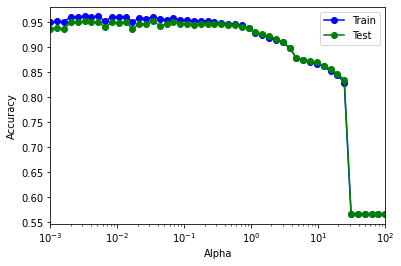

In [62]:
pyplot.xlabel('Alpha')
pyplot.ylabel('Accuracy')

pyplot.semilogx(alpha_arr, train_acc, 'b-o', label = 'Train')
pyplot.semilogx(alpha_arr, test_acc, 'g-o', label = 'Test')
pyplot.legend()

pyplot.xlim([numpy.min(alpha_arr), numpy.max(alpha_arr)])
pass

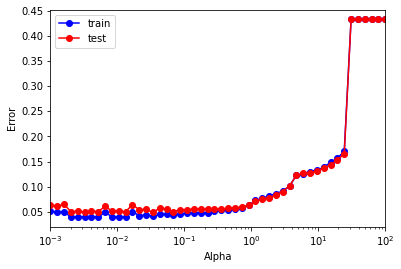

In [63]:
pyplot.xlabel('Alpha')
pyplot.ylabel('Error')

pyplot.semilogx(alpha_arr, train_err, 'b-o', label = 'train')
pyplot.semilogx(alpha_arr, test_err, 'r-o', label = 'test')
pyplot.legend()

pyplot.xlim([numpy.min(alpha_arr), numpy.max(alpha_arr)])
pass

Из графиков видно, что при небольших значениях параметра регуляризации (когда alpha < 1), наблюдается точность больше 90 процентов, но при alpha > 10^0 происходит резкое понижение точности, то есть наблюдается недообучение.

Возьмём в качестве оптимального значения alpha = 0.1

In [70]:
alpha_opt = 0.1

mlp = MLPClassifier(alpha=alpha_opt,
                    hidden_layer_sizes=(25,40),
                    solver='adam',
                    activation='relu',
                    random_state=42
                    )
mlp.fit(x_train, y_train)

y_train_pred = mlp.predict(x_train)
y_test_pred = mlp.predict(x_test)

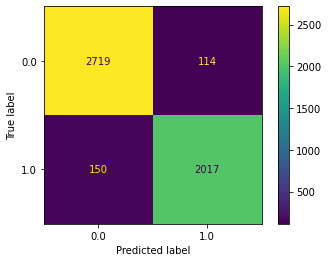

In [71]:
c_m = confusion_matrix(y_test, mlp.predict(x_test), labels=mlp.classes_)
ConfusionMatrixDisplay(confusion_matrix=c_m, display_labels=mlp.classes_).plot()
pyplot.show()
pass

###Вывод

**Подбор числа нейронов в двуслойной моделе**

Наблюдается недообучение тренировочной выборки на 1%, по сравнению с тестовой (это видно из графиков, на тестовой выборке преобладает жёлтоватый цвет, в то время как на тренировочной зеленоватый)
За оптимальные размеры скрытых слоёв возьмём минимум ошибки и максимум точности на тестовой выборке 95% - 25 и 40 нейронов

**Подбор параметра регуляризации**

Как уже было замечено выше, с ростом коэффициента регуляризации растёт ошибка и соответственно снижается точность. Это говорит о том, что после обучения у модели не возникает больших значений весовых коэффициентов, а значит нет переобучения у модели. При alpha > 10^1 начинается рост ошибки и снижение точности, то есть с ростом alpha веса модели уменьшаются и стремятся к нулю.